In [63]:
import random
import torch
import matplotlib.pyplot as plt

In [64]:
# 生成数据
def synthesis_data(true_w, true_b, sample_size):
    X = torch.normal(0, 1, size=(sample_size, len(true_w)))
    Y = torch.matmul(X, true_w) + true_b
    Y += torch.normal(0, 0.01, Y.shape)
    return X, Y.reshape(-1, 1)

In [65]:
true_w = torch.tensor([3.0, 9.0])
true_b = torch.tensor(3.2)

features, labels = synthesis_data(true_w, true_b, 1000)

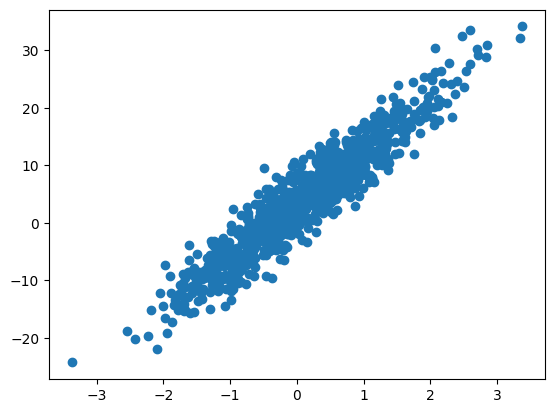

In [66]:
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy())
plt.show()

In [67]:
# 小批量获取数据
def data_iter(batch_size, features, labels):
    # 需要打乱顺序
    indices = list(range(len(features)))
    random.shuffle(indices)
    for i in range(0, len(features), batch_size):
        lenth = min(batch_size, len(features) - i)
        yield features[indices[i:i+lenth]], labels[indices[i:i+lenth]]

In [68]:
for sample in data_iter(5, features, labels):
    print(sample[0], sample[1])
    break

tensor([[-0.9492, -2.2299],
        [ 0.8850, -1.2336],
        [-0.5805, -0.0974],
        [-0.4835, -0.7582],
        [-0.8187,  0.7799]]) tensor([[-19.7069],
        [ -5.2404],
        [  0.5787],
        [ -5.0761],
        [  7.7646]])


In [69]:
def linreg(w, b, features):
    return torch.matmul(features, w) + b

In [70]:
def squared_loss(y_true, y):
    return (y_true - y.reshape(y_true.shape))**2/2

In [71]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()
            

In [72]:
batch_size = 10
epochs = 3
net = linreg
loss_func = squared_loss
lr = 0.3

In [73]:
# 初始化参数
w = torch.normal(0, 1, size=true_w.shape, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [74]:
for _ in range(epochs):
    for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
        y_pred = net(w, b, X)
        loss = loss_func(y, y_pred)
        loss.sum().backward()
        sgd([w, b], lr, batch_size=batch_size)

        with torch.no_grad():
            loss = loss_func(net(w, b, X), y)
            print(f'loss: {loss.mean()}')

loss: 17.83672523498535
loss: 12.330578804016113
loss: 5.265435695648193
loss: 2.720883846282959
loss: 1.3470021486282349
loss: 0.5055193305015564
loss: 0.15306362509727478
loss: 0.1324072629213333
loss: 0.0573488287627697
loss: 0.03572484105825424
loss: 0.008265076205134392
loss: 0.005240175407379866
loss: 0.0015512017998844385
loss: 0.0009818498510867357
loss: 0.00035351834958419204
loss: 0.00028019020101055503
loss: 0.00014136338722892106
loss: 0.00010363134788349271
loss: 9.367323946207762e-05
loss: 3.9502941945102066e-05
loss: 2.7107462301501073e-05
loss: 0.00011603427992668003
loss: 3.336176087032072e-05
loss: 2.9218464987934567e-05
loss: 3.019814357685391e-05
loss: 2.9084738343954086e-05
loss: 1.3569826478487812e-05
loss: 3.052708416362293e-05
loss: 3.6860954423900694e-05
loss: 6.0470330936368555e-05
loss: 5.794316530227661e-05
loss: 1.290119962504832e-05
loss: 5.364133539842442e-05
loss: 1.2709788279607892e-05
loss: 0.00011834655742859468
loss: 5.967976903775707e-05
loss: 3.614

In [75]:
w, b

(tensor([2.9986, 9.0005], requires_grad=True),
 tensor(3.2002, requires_grad=True))